In [1]:
import csv
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:


# Load data
data_train = pd.read_csv('weatherHistory.csv')

data_train['Date'] = pd.to_datetime(data_train['Formatted Date'], utc=True, errors='coerce')

# Check if conversion was successful
print("Date column type:", data_train['Date'].dtype)

# Check rows with conversion errors
print(data_train[data_train['Date'].isna()])

# Drop rows where Date is NaT
data_train = data_train.dropna(subset=['Date'])

# Extract day, month, and year
data_train['Day'] = data_train['Date'].dt.day
data_train['Month'] = data_train['Date'].dt.month
data_train['Year'] = data_train['Date'].dt.year


Date column type: datetime64[ns, UTC]
Empty DataFrame
Columns: [Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), Daily Summary, Date]
Index: []


In [5]:
data_train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Day,Month,Year
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,31,3,2006
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,31,3,2006
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,1,4,2006
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,1,4,2006
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,1,4,2006


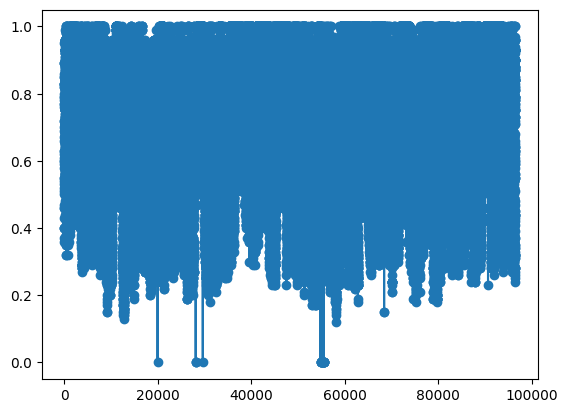

In [8]:
plt.plot(data_train["Temperature (C)"])
plt.plot(data_train["Humidity"])
plt.plot(data_train["Pressure (millibars)"])
plt.show()

In [3]:
data_train['Temperature (C)'] = pd.to_numeric(data_train['Temperature (C)'], errors='coerce')
data_train['Humidity'] = pd.to_numeric(data_train['Humidity'], errors='coerce')
data_train['Wind Speed (km/h)'] = pd.to_numeric(data_train['Wind Speed (km/h)'], errors='coerce')
data_train['Pressure (millibars)'] = pd.to_numeric(data_train['Pressure (millibars)'], errors='coerce')
print("NaN values in numerical columns:")
print(data_train[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].isna().sum())

NaN values in numerical columns:
Temperature (C)         0
Humidity                0
Wind Speed (km/h)       0
Pressure (millibars)    0
dtype: int64


In [4]:
data_train = data_train.dropna(subset=['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'])

# Prepare training data
X_train = data_train[['Day', 'Month', 'Year']]
y_train = data_train[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]

In [5]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
model_temperature = LinearRegression()
model_humidity = LinearRegression()
model_speed = LinearRegression()
model_pressure = LinearRegression()

# Train models
model_temperature.fit(X_train_set, y_train_set['Temperature (C)'])
model_humidity.fit(X_train_set, y_train_set['Humidity'])
model_speed.fit(X_train_set, y_train_set['Wind Speed (km/h)'])
model_pressure.fit(X_train_set, y_train_set['Pressure (millibars)'])

LinearRegression()

In [7]:
def predictWeather(d, m, y):
    features = [[d, m, y]]
    temp = model_temperature.predict(features)[0]
    hum = model_humidity.predict(features)[0]
    speed = model_speed.predict(features)[0]
    pressure = model_pressure.predict(features)[0]
    return temp, hum, speed, pressure

# Input from user
print("use number day like day : 06 mouth : 09 year : 2024")
print("this model and dataset is demo ")
iD = int(input("Day: "))
iM = int(input("Month: "))
iY = int(input("Year: "))

# Prediction
temperature, humidity, wind_speed, pressure = predictWeather(iD, iM, iY)
print(f"\nPredicted Temperature: {temperature:.2f}°C")
print(f"Predicted Humidity: {humidity:.2f}")
print(f"Predicted Wind Speed: {wind_speed:.2f} km/h")
print(f"Predicted Pressure: {pressure:.2f} millibars")

use number day like day : 06 mouth : 09 year : 2024
this model and dataset is demo 

Predicted Temperature: 13.68°C
Predicted Humidity: 0.77
Predicted Wind Speed: 10.28 km/h
Predicted Pressure: 1011.12 millibars


c:\Users\hoker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hoker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hoker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hoker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
